In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### A quick look at our data and inspect

#### Read the data using pandas read_excel

In [4]:
df = pd.read_excel("dataset/input_data.xlsx")

#Displaying the head of the data
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


#### Shape of the data

In [5]:
df.shape

(8500, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


### Observation:

- There are 4 columns and all are string columns
- There are totally 8500 rows and there seems to be mising values in Short description and Description columns, which needs to be looked into and handled
- Caller columns mainly contains the details of the user who raised the incident and is of not much use in our analysis and can be dropped.
- Assignment group is our predictor / target column with multiple classes. 
- This is a Multiclass Classification problem 

### Lets drop Caller column as its does not seems to contribute in predicting the target

In [7]:
df_incidents = df.drop('Caller',axis=1)

### Lets see the number of classes in the Assignment group

In [8]:
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [9]:
len(df_incidents['Assignment group'].unique())

74

In [10]:
# df['Description'].to_csv('file_df.csv')
# !perl -ne 'print "$. $_" if m/[\x80-\xFF]/'  file_df.csv

#### -- The Assigment group contains 74 different classes

In [11]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


### Lets visualize the percentage of incidents per assignment group

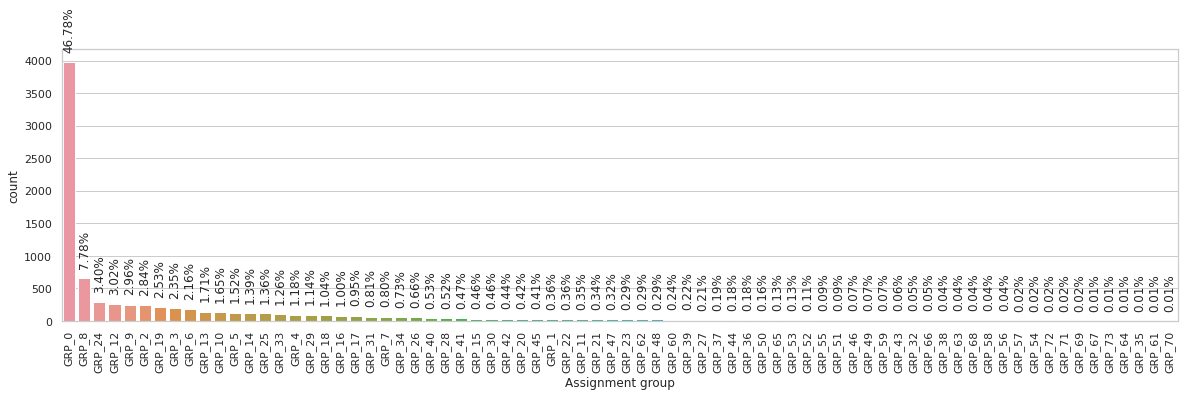

In [12]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

### Observation
- This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
- There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2  incidents, need to see if we can drop those rows due to the lack of samples representing those classes. They might not be of much help as a predictor

### Lets view the top 20 Assignment groups with highest number of tickets

In [13]:
df_top_20 = df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


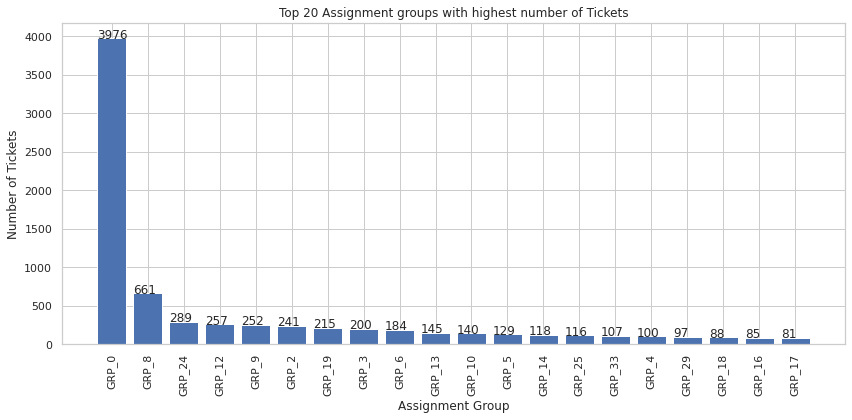

In [14]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

### Lets view the bottom 20 Assignment groups with less number of tickets

In [15]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_67,1
1,GRP_73,1
2,GRP_64,1
3,GRP_35,1
4,GRP_61,1
5,GRP_70,1
6,GRP_57,2
7,GRP_54,2
8,GRP_72,2
9,GRP_71,2


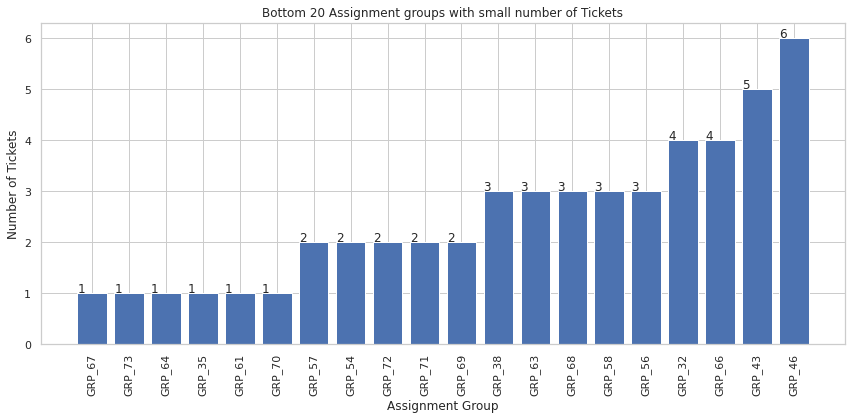

In [16]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

### Distribution of tickets counts in various bins

In [17]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


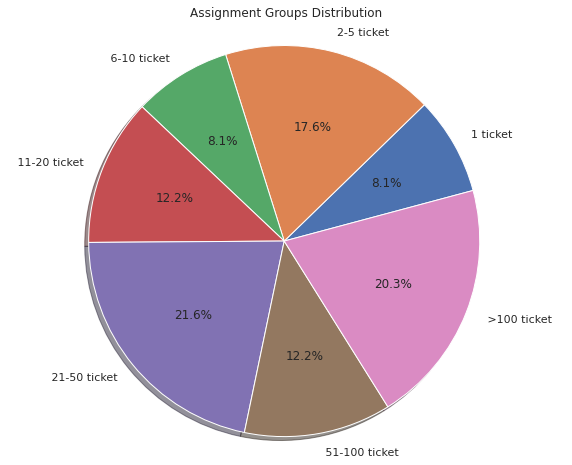

In [18]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

- We see that there are 6 Assignment Group’s for which just have 1 ticket in the dataset
- There are 15 Assignment group’s which have more than 100 tickets. 
- Only 20% of the Assignment groups have greater than 100 tickets.

### Missing Values

There are missing values in the dataset, within 'Short decription' and 'Description' columns, lets view the missing values and impute them.

In [19]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [20]:
df_incidents[df_incidents['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


- Lets replace nan values with '' (empty string)
- And then concatenate Short Description and Description to form a single column named 'New_Description' and use it as a predictor. so that we won't miss any necessary info about the ticket.


In [21]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [22]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [23]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [24]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


## Derive insights on ticket distribution by L1/L2 and L3

In [25]:
df_incidents_level = df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

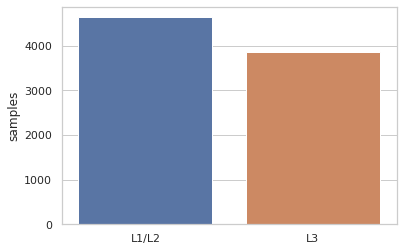

In [26]:
x=df_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

### Characters in Short description by L1/L2 and L3

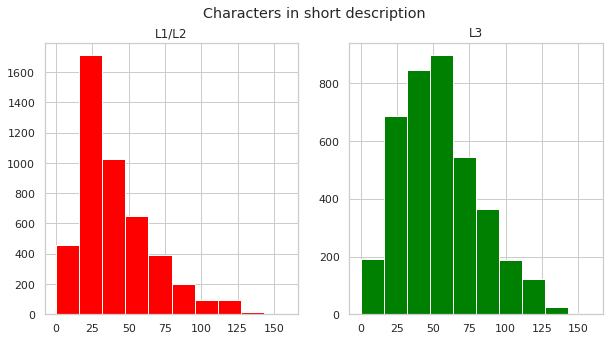

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in short description')
plt.show()

### Words in Short description by L1/L2 and L3

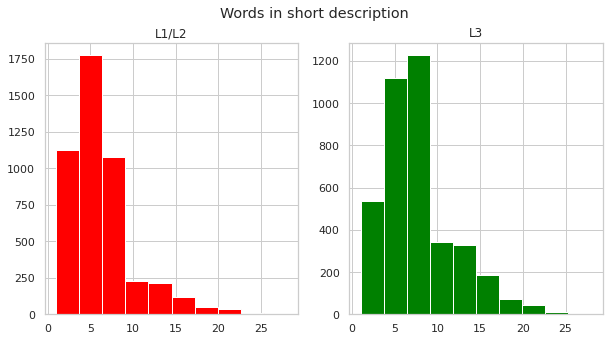

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in short description')
plt.show()

In [29]:
df_incidents_level['Short description']=df_incidents_level['Short description'].apply(str)

def ave_word_len(sentence):
    words  = sentence.split(" ")
    return ((sum((len(word) for word in words))/len(words)))

df_incidents_level["short_description_avg_word_len"] = df_incidents_level["Short description"].apply(ave_word_len)

### Average word length in Short description by L1/L2 and L3

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py

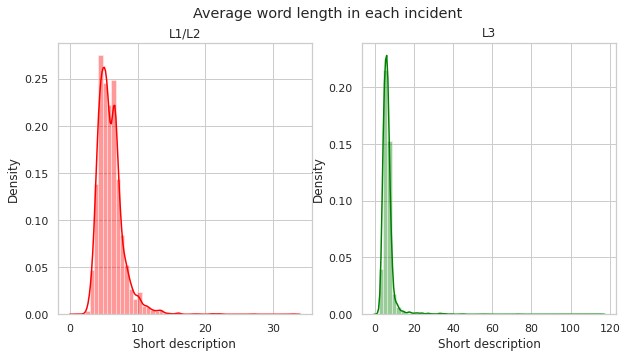

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('L1/L2')
word=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('L3')
fig.suptitle('Average word length in each incident');

### Number of upper case in Short description by L1/L2 and L3

In [31]:
df_incidents_level["short_description_nupper"] = df_incidents_level["Short description"].apply((lambda word: len([x for x in word.split() if x.isupper()])))
df_incidents_level[["Short description","short_description_nupper"]].sort_values(by = "short_description_nupper",ascending = False).head()

,Short description,short_description_nupper
4693,hzptilsw wusdajqv : log on balancing error for...,2
5964,add im:mfg_planner_reference to the miiadmin e...,2
4976,"please check the ale in detail, we have ongoin...",2
1848,erp SID_34 and erp SID_1 password reset,2
4324,reset password user zigioachstyac - SID_34 /SI...,2


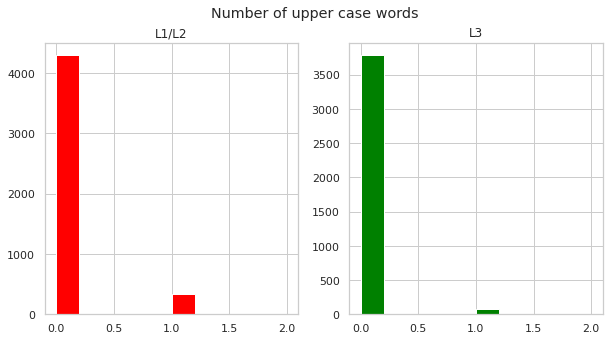

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_nupper']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_nupper']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Number of upper case words')
plt.show()

### Number of digits in Short description by L1/L2 and L3

In [33]:
df_incidents_level["short_description_ndigits"] = df_incidents_level["Short description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_incidents_level[["Short description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()

,Short description,short_description_ndigits
5469,sto 5019179518 is for 2 pcs of material 631688...,4
2867,prdord 226040587 226040835 226040589 2...,4
6287,i am stuck. has 3 lines. lines 40 and 50...,4
145,unable to start dell 7350 2 in 1 device,3
3235,no audio in dell 7350 2 in 1 tablet,3


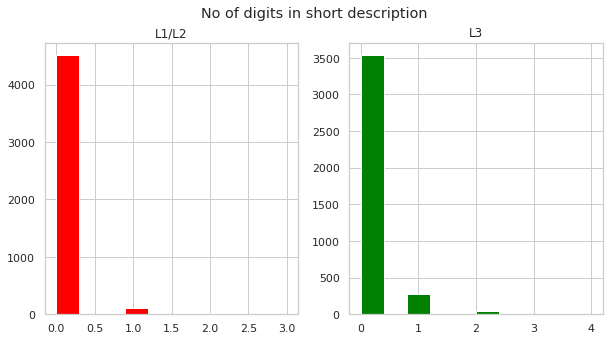

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_ndigits']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_ndigits']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('No of digits in short description')
plt.show()

## Let use word cloud to visualize the type of words used in Description

Word cloud is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text. Here our words can simply be taken from the column "text"

In [35]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

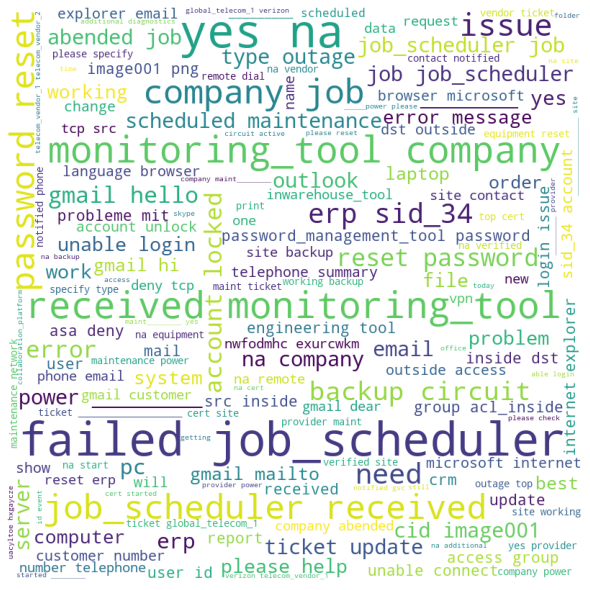

In [36]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_incidents.New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Lets view the word cloud of top 4 assignment groups to see the kind of tickets assigned to them

### Word Cloud for tickets with Assignment group 'GRP_0'

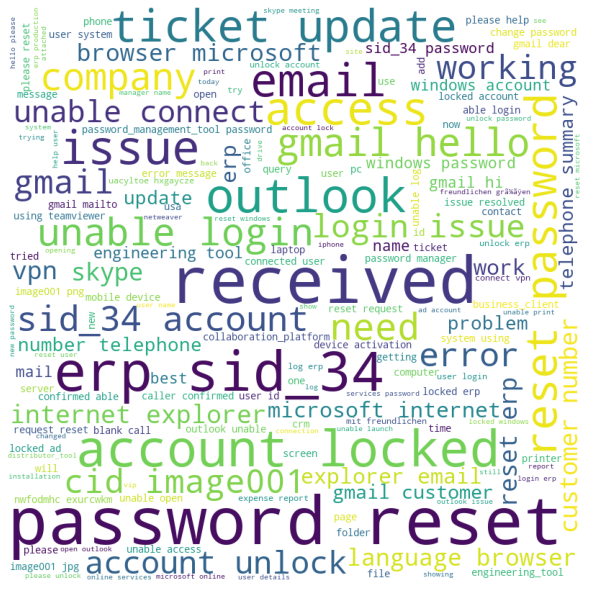

In [37]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_0 seems to have tickets related to password reset, access issues , login issue, connectivity issue etc..

### Word Cloud for tickets with Assignment group 'GRP_8'

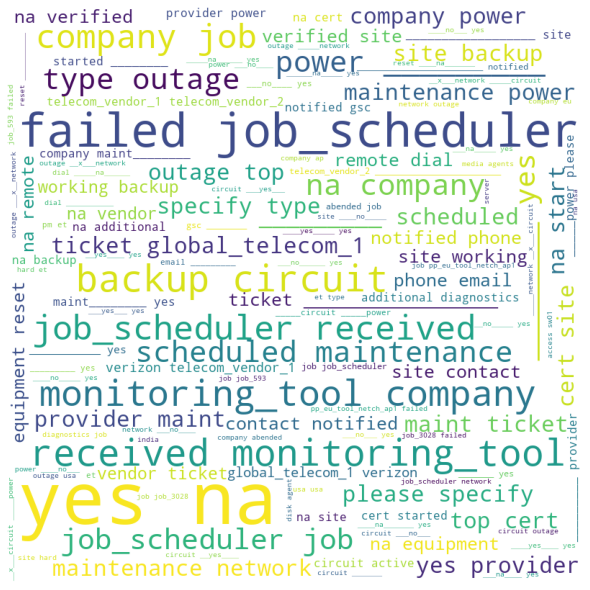

In [38]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

### Word Cloud for tickets with Assignment group 'GRP_12'

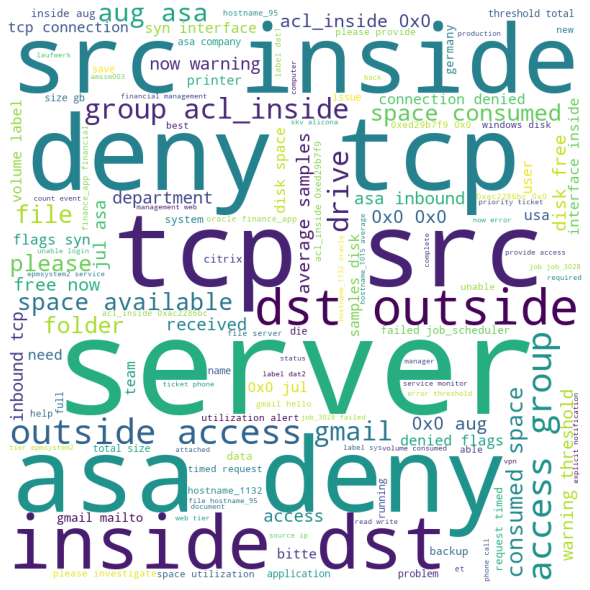

In [39]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_12 contains tickets related to systems like  disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.

### Word Cloud for tickets with Assignment group 'GRP_24'

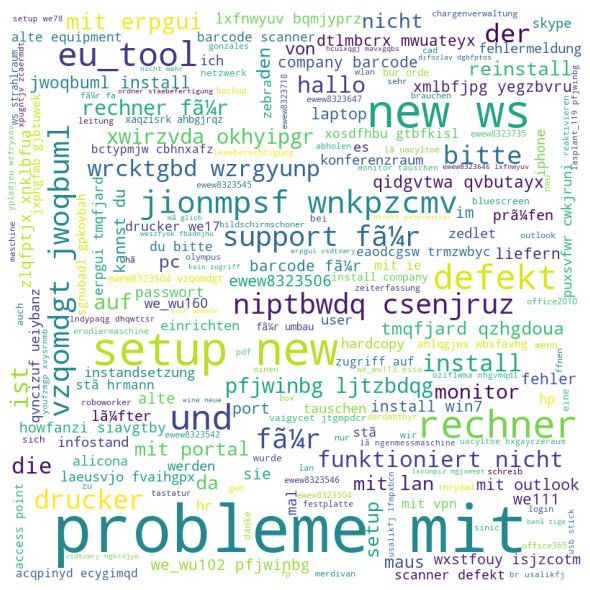

In [40]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_24 - Tickets are mainly in german, these tickets need to be translated to english before passing it to our model.

### Seems like there are few tickets with description in some other language, probably in German

In [41]:
df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description

222     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
305     probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...
306     support fÃ¼r we111\zlqfptjx xnklbfua support f...
349     install EU_tool \laeusvjo fvaihgpx install EU_...
441     probleme mit portal \knlrgsiv cqvuexjz problem...
446     setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...
453     probleme mit erpgui \tmqfjard qzhgdoua problem...
454     support fÃ¼r fa.thrydsss-funke \laeusvjo fvaih...
455     bildband  tauschen \drucker we68678 \vepxdgot ...
555     probleme mit fixiereinheit we101 \qvncizuf uei...
586     probleme mit bluescreen  hallo ,\n\ngerade ebe...
589     probleme mit lan fÃ¼r rechner erodiermaschine\...
744     drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...
748     reinst

### Lets analyse this further

In [42]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


In [43]:
#Lets encode the string, to make it easier to be passed to language detection api.
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df_incidents['New_Description'] = df_incidents['New_Description'].apply(fn_decode_to_ascii)

### Detect the language the ticket is raised by

In [ ]:
!pip install langdetect

In [44]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)

ModuleNotFoundError: ignored

In [ ]:
df_incidents["language"].value_counts()

In [ ]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

- We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english.
- We will be using google translate package to translate

In [ ]:
!pip install googletrans

In [ ]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

### Translate the text to English

In [ ]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

Note: Google Translate API is used for translating the german text, however there is limit imposed from Google on the number of requests from a particular ip address. So the traslation was done in batches and save to a file. Which will be used for further processing

#### We mainly see that GRP_0 contains incidents related to account lockout, lets see if other groups also have incidents related to account lockout

In [ ]:
df_incidents[df_incidents["Short description"].str.contains("account lock")]["Assignment group"].value_counts()

In [ ]:
df_incidents[df_incidents["Short description"].str.contains("oneteam")]["Assignment group"].value_counts()

## Data Cleaning
Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. 

In [ ]:
df_tranlated_text = pd.read_csv('dataset/inc_tranlated.csv',encoding='utf-8')
df_tranlated_inc = df_tranlated_text.drop(['Short description','Unnamed: 0','lan','New_Description'],axis=1)
df_tranlated_inc.English_Description=df_tranlated_inc.English_Description.astype(str)
df_tranlated_inc.head()

In [ ]:
df_tranlated_inc.info()

In [ ]:
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text


In [ ]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))
df_tranlated_inc.drop(['English_Description'],axis=1,inplace=True)

In [ ]:
df_tranlated_inc['cleaned_description'].head()

### Removal of Stop Words
Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.

In [ ]:
## Removal of Stop Words

from nltk.corpus import stopwords
stop = stopwords.words('english')
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_tranlated_inc['cleaned_description'].head()

### Lemmatization

In [ ]:
## Lemmatization
import nltk
#nltk.download('wordnet')

from textblob import Word
df_tranlated_inc['cleaned_description']= df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_tranlated_inc['cleaned_description'].head()

### take a look at the average (mean) number of words in each ticket, and the longest and shortest description in our data set

In [ ]:
df_tranlated_inc['num_wds'] = df_tranlated_inc['cleaned_description'].apply(lambda x: len(x.split()))
df_tranlated_inc['num_wds'].mean()

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

In [ ]:
len(df_tranlated_inc[df_tranlated_inc['num_wds']==0])

### Consider tickets with words greater than 1

In [ ]:
df_tranlated_inc= df_tranlated_inc[df_tranlated_inc['num_wds']>1]

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

### Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))


df_tranlated_inc['avg_word'] = df_tranlated_inc['cleaned_description'].apply(lambda x: avg_word(str(x)))
df_tranlated_inc.head()

## visualize a distribution of the description word counts to see how skewed our average might be by outliers. Let's generate another plot to take a look:

In [ ]:
ax=df_tranlated_inc['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

### Number of unique words in each article

In [ ]:
df_tranlated_inc['uniq_wds'] = df_tranlated_inc['cleaned_description'].str.split().apply(lambda x: len(set(x)))
df_tranlated_inc['uniq_wds'].head()

### average (mean) number of unique words per incident, and the minimum and maximum unique word counts.

In [ ]:
print(df_tranlated_inc['uniq_wds'].mean())
print(df_tranlated_inc['uniq_wds'].min())
print(df_tranlated_inc['uniq_wds'].max())

In [ ]:
ax=df_tranlated_inc['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

When we plot this into a chart, we can see that while the distribution of unique words is still skewed, it looks a bit similar to the distribution based on total word counts we generated earlier.

### Mean Number of Words in tickets per Assignment Group

In [ ]:
assign_grps = df_tranlated_inc.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

### Mean Number of Unique Words in tickets per Assignment Group

In [ ]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

Finally, let’s look at the most common words over the entire corpus.

In [ ]:
wd_counts = Counter()
for i, row in df_tranlated_inc.iterrows():
    wd_counts.update(row['cleaned_description'].split())
    
wd_counts.most_common(20)

Above, we can see some pretty predictable words

### Tokenization
Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc.

In [ ]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_tranlated_inc['token_desc'] = df_tranlated_inc['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df_tranlated_inc['token_desc'].head()

In [ ]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df_tranlated_inc['token_desc'] = df_tranlated_inc['token_desc'].apply(lambda x : combine_text(x))

In [ ]:
df_tranlated_inc.info()

In [ ]:
df_tranlated_inc.to_csv("dataset/cleaned_data.csv")

In [ ]:
df_tranlated_inc = pd.read_csv('dataset/processed_file_modellling.csv',encoding='utf-8')
df_tranlated_inc.head()

### Transforming tokens to a vector using tfidf

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_tranlated_inc['token_desc'])

In [ ]:
len(inc_tfidf.todense())

In [ ]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)

### TF-IDF Distribution

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf["tfidf"])

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

### Dimentionality reduction using t-SNE

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(inc_tfidf)

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

In [ ]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

<b> We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset. </b>

### Generate Topics using LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# create count vectorizer first
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(df_tranlated_inc['token_desc'])

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)

In [ ]:
n_top_words = 10
topic_summaries = []

# get topics and topic terms
topic_word = lda_model.components_ 
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

<b> We can see that password related tickets are classified as topic 3, account related tickets in topic 7 , job scheduler related tickets in topic 8 etc </b>

### tf-idf array into pandas dataframe

In [ ]:
# collect the tfid matrix in numpy array
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

#### Adding the output to the dataframe

In [ ]:
df_tranlated_inc.head()

In [ ]:
df_inc['num_wds']= df_tranlated_inc['num_wds']
df_inc['avg_word']= df_tranlated_inc['avg_word']
df_inc['Assignment_group']= df_tranlated_inc['Assignment_group']
df_inc.head()

In [ ]:
features = df_inc.columns.tolist()
output = 'Assignment_group'
# removing the output and the id from features
features.remove(output)

In [ ]:
df_inc_sample = df_inc[df_inc['Assignment_group'].map(df_inc['Assignment_group'].value_counts()) > 100]

In [ ]:
df_inc_sample.shape

In [ ]:
df_inc_sample['Assignment_group'].value_counts()

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota